In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise

In [14]:



train_datagen = ImageDataGenerator( validation_split =0.15, 
        rescale=1./255)

test_datagen = ImageDataGenerator( rescale=1./255)

train_data = train_datagen.flow_from_directory(
       r'/content/drive/MyDrive/gaussainnoise/train',
        target_size=(256,256),
        batch_size=190,subset ='training',
        class_mode='categorical')
valid_data = train_datagen.flow_from_directory(
       r'/content/drive/MyDrive/gaussainnoise/train',
        target_size=(256,256),
        batch_size=32,subset ='validation',
        class_mode='categorical')

Found 9152 images belonging to 143 classes.
Found 1573 images belonging to 143 classes.


In [2]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (5,5), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu', input_shape = (256,256,3)))
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(143, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 48)      9648      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     55424     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 192)       2

In [4]:

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("/content/drive/MyDrive/cnn-noise-143/noise-cnn-143_model_history_log.csv", append=True)
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
es1 = EarlyStopping( monitor='val_accuracy', patience=5, min_delta=0.001, mode='max')
mc = ModelCheckpoint('/content/drive/MyDrive/cnn-noise-143/noise-cnn_143-cnnmodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True,save_weights_only=True)

In [5]:
import tensorflow.compat.v1 as tfs
gpu_options = tfs.GPUOptions(allow_growth = True)
session = tfs.InteractiveSession(config = tfs.ConfigProto(gpu_options = gpu_options))

In [3]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 0.9)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [15]:
history = model.fit(train_data, validation_data= valid_data,epochs = 300, callbacks = [mc,csv_logger,es1],shuffle =True )

Epoch 1/300
49/49 [==============================] - 326s 7s/step - loss: 14.6138 - accuracy: 0.5084 - val_loss: 28.5401 - val_accuracy: 0.0089

Epoch 00001: val_accuracy improved from 0.00000 to 0.00890, saving model to /content/drive/MyDrive/cnn-noise-143/noise-cnn_143-cnnmodel.h5
Epoch 2/300
49/49 [==============================] - 338s 7s/step - loss: 14.5294 - accuracy: 0.5304 - val_loss: 24.9718 - val_accuracy: 0.0165

Epoch 00002: val_accuracy improved from 0.00890 to 0.01653, saving model to /content/drive/MyDrive/cnn-noise-143/noise-cnn_143-cnnmodel.h5
Epoch 3/300
49/49 [==============================] - 314s 6s/step - loss: 14.4554 - accuracy: 0.5554 - val_loss: 18.6269 - val_accuracy: 0.0102

Epoch 00003: val_accuracy did not improve from 0.01653
Epoch 4/300
49/49 [==============================] - 314s 6s/step - loss: 14.3928 - accuracy: 0.5758 - val_loss: 16.0763 - val_accuracy: 0.0572

Epoch 00004: val_accuracy improved from 0.01653 to 0.05722, saving model to /content/dr

In [5]:
model.save_weights(r'D:\Uni-passau\thesis-results\143-dataset\gaussian-cnn\noise-cnn_143-cnnmodel-weights.h5')

In [6]:
test_datagen_nor = ImageDataGenerator(rescale=1./255)

test_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,validation_split=0.5,
        height_shift_range=0.15,
        horizontal_flip=True,rotation_range=10,
        rescale=1./255)

In [ ]:
## train data and valid data

In [20]:
train_acc=model.evaluate(train_data)
val_acc = model.evaluate(valid_data)
print("Train_Accuracy: %.2f%%" % (train_acc[1]*100))
print("valid_Accuracy: %.2f%%" % (val_acc[1]*100))

50/50 [==============================] - 40s 805ms/step - loss: 13.3603 - accuracy: 0.9256
Train_Accuracy: 99.55%
valid_Accuracy: 92.56%


In [ ]:
## normal dataset

In [22]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
117/117 [==============================] - 3274s 28s/step - loss: 13.1502 - accuracy: 0.9287
Test_Accuracy: 92.87%


In [9]:

test_genrator_nor = test_datagen_nor.flow_from_directory( r'E:\thesis-dataset\dataset\test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
 26/117 [=====>........................] - ETA: 3:06 - loss: 16.9544 - accuracy: 0.0024

KeyboardInterrupt: 

In [ ]:
## normal dataset augumenattion

In [ ]:
test_genrator_aug = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

In [ ]:
## gaussian noise

In [8]:
test_genrator_gau_nor = test_datagen_nor.flow_from_directory( r'E:\thesis-dataset\gaussainnoise\test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 3718 images belonging to 143 classes.
 15/117 [==>...........................] - ETA: 8:51 - loss: 16.9550 - accuracy: 0.0021   

KeyboardInterrupt: 

In [ ]:
test_genrator_gau_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/gaussainnoise/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

In [ ]:
## gaussian noise data augumentation

In [ ]:
test_genrator_gau_augmen = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/gaussian-50/test',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_augmen)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

In [ ]:
## salt and pepper

In [ ]:
test_genrator_salt = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/saltandpeppernoise',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_salt)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

In [ ]:
## corrupted -20%

In [ ]:
test_corrupted1= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/corrupted-1(20)',
        batch_size=32,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted1)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

In [ ]:
##corrupted -50%

In [ ]:
test_corrupted2= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/corrupted-2(50)',
        batch_size=32,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

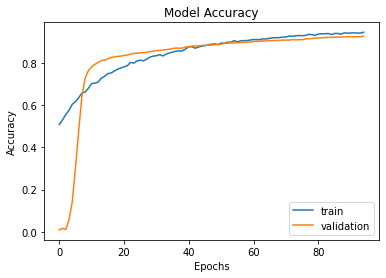

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/gaussiannoise_cnnmodel/cnn--gaussian-augu-143-accuracy.png')
plt.show()

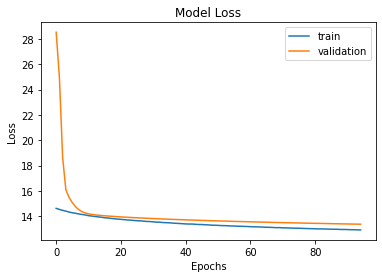

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/gaussiannoise_cnnmodel/cnn-gaussain-augu-143-loss.png')
plt.show()